# Announcements - Friday, December 9
* Download the files on Canvas->Files->mikes_lecture_notes->lec38_plotting_3
* [**Course evaluations**](https://aefis.wisc.edu) available now.
  * 9:55 = 37% response rate
  * 3:30 = 28% response rate
* Projects
  * Everything due Wednesday December 14
  * **Late days may not be used for P13**
* Q10 due tonight
* Final Exam
  * December 19, 5:05 - 7:05 pm  (McBurney 4:30 to 8:30 pm)
  * Please fill out the [exam conflict form](https://cs220.cs.wisc.edu/f22/surveys.html)
    * Conflict form will be taken down on **Wednesday, December 14**
    * McBurney accomodation conflicts need to make appointment with T&E by **Today**.
    * Scheduled alternate time is December 20, 10am to 12pm
* [Zoom Link](https://uwmadison.zoom.us/j/9741859842?pwd=OURuZnZuL0lhYlJkNVJHR1pLeUQwUT09)
  * Projector Only, No Audio, The class is not livestreamed, 9:55 lecture only 


In [1]:
# Run this cell to make the emphasized text red and use the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

In [1]:
%matplotlib inline

In [2]:
# import statements
import sqlite3
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 16

#### Warmup 1: Write a function that converts any Fehrenheit temp to Celcius
C = (5/9) * (f-32)

In [3]:
def f_to_c(f):
    return (5/9)*(f-32)

# test it by making several calls
print(f_to_c(32))
print(f_to_c(212))
print(f_to_c(0))

0.0
100.0
-17.77777777777778


#### Warmup 2a: What is the name of the only table inside of iris-flowers.db?

In [ ]:
# Establish a connection to "iris-flowers.db" database
iris_conn = ???
???

#### Warmup 2b: Save & display all the data from this table to a variable called "iris_df"

In [ ]:
iris_df = ???
iris_df

#### Warmup 3: Scatter plot to visualize relationship between `pet-width` and `pet-length`

In [ ]:
# complete this code to make 3 plots in one

colors = ["blue", "green", "red"]
markers = ["o", "^", "v"]

# getting unique class column values
varietes = list(set(iris_df["class"]))

plot_area = None
for i in range(len(varietes)):
    variety = varietes[i]
    
    # make a df just of just the data for this variety
    variety_df = iris_df[iris_df["class"] == variety] 
    
    #make a scatter plot for this variety
    plot_area = variety_df.plot.scatter(x = "pet-width", y = "pet-length", \
                                        label = variety, color = colors[i],
                                        marker = markers[i], \
                                        ax = plot_area)

#### Let's focus on "Iris-virginica" data

In [ ]:
iris_virginica = ???
# assert that length of iris_virginica is exactly 50
???
iris_virginica.head()

#### Create scatter plot to visualize relationship between `pet-width` and `pet-length`

### Let's learn about *xlim* and *ylim*
- Allows us to set x-axis and y-axis limits
- Takes either a single value (LOWER-BOUND) or a tuple containing two values (LOWER-BOUND, UPPER-BOUND)
- You need to be careful about setting the UPPER-BOUND

In [ ]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                    xlim = ???, ylim = ???,
                    figsize = (3, 3))

# What is wrong with this plot?

What is the maximum `pet-length`?

In [ ]:
# How do we extract `pet-length` column Series?


For every set method, there is a corresponding get method. Try `ax.get_ylim()`.

Let's include assert statements to make sure we don't crop the plot!

In [ ]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 6), ylim = (0, 6),
                     figsize = (3, 3))

#print("Ran into AssertionError while checking axes limits")

### Now let's try all 4 assert statements

```
assert iris_virginica[ax.get_xlabel()].min() >= ax.get_xlim()[0]
assert iris_virginica[ax.get_xlabel()].max() <= ax.get_xlim()[1]
assert iris_virginica[ax.get_ylabel()].min() >= ax.get_ylim()[0]
assert iris_virginica[ax.get_ylabel()].max() <= ax.get_ylim()[1]
```

In [ ]:
ax = iris_virginica.plot.scatter(x = "pet-width", y = "pet-length",
                     xlim = (0, 7), ylim = (0, 7),
                     figsize = (3, 3))


In [ ]:
# Close the database connection.


# Plotting Applications

**Learning Objectives**

- Make a line plot on a series or on a DataFrame
- Apply features of line plots and bar plots to visualize results of data investigations
- Clean Series data by dropping NaN values and by converting to int
- Make a stacked bar plot

## Line plots
- `SERIES.plot.line()`       each value in the Series becomes y-value and each index becomes x-value
- `DATAFRAME.plot.line()`    each column in the data frame becomes a line in the plot
- ***IMPORTANT***: lines in line plots shouldn't be crooked, you need to sort the values based on increasing order of indices!

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html

### Plotting line from a Series

<AxesSubplot:>

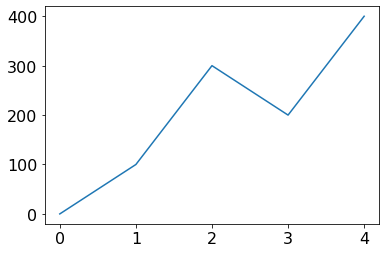

In [5]:
# when you make a series from a list, the default indices 0, 1, 2, ...
s = Series([0, 100, 300, 200, 400])
s.plot.line()

<AxesSubplot:>

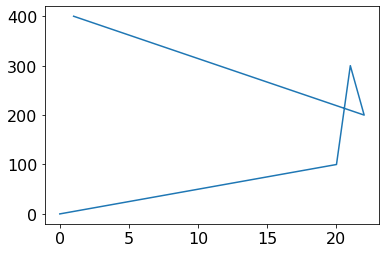

In [10]:
s = Series([0, 100, 300, 200, 400], index = [0, 20, 21, 22, 1])
s.plot.line() # oops this produces a crooked line plot!


0       0
1     400
20    100
21    300
22    200
dtype: int64

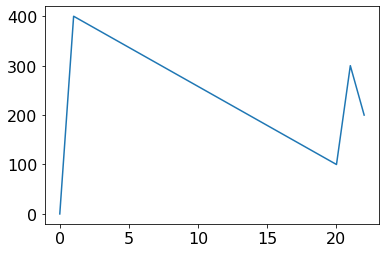

In [11]:
# Let's fix it by sorting the Series values based on the indices
s=s.sort_index()
s.plot.line()
s

### Craft breweries example

<AxesSubplot:title={'center':'Craft Breweries in the USA'}, xlabel='Year', ylabel='Craft Breweries'>

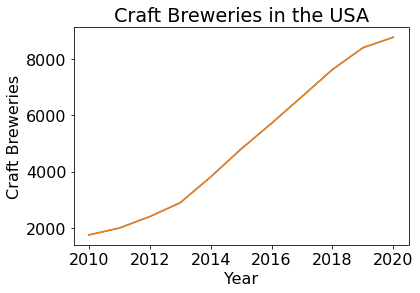

In [14]:
# You can make a series from a list and add indices
s = Series([1758, 2002, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764], \
           index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

# We can save the AxesSubplot and "beautify" it like the other plots...
ax=s.plot.line()
# Set title to "Craft Breweries in the USA"
ax.set_title('Craft Breweries in the USA')
# Set x-axis label to "Year"
ax.set_xlabel('Year')
# Set y-axis label to "# Craft Breweries"
ax.set_ylabel('Craft Breweries')


<AxesSubplot:>

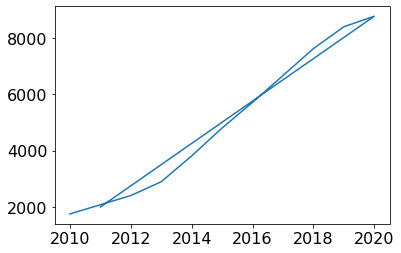

In [15]:
# Be careful! If the indices are out of order you get a mess
# pandas plots each (index, value) in the order given
s = Series([1758, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764, 2002], \
           index=[2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2011])
# TODO: fix this crooked line plot
s=s.sort_index()
s.plot.line()

<AxesSubplot:>

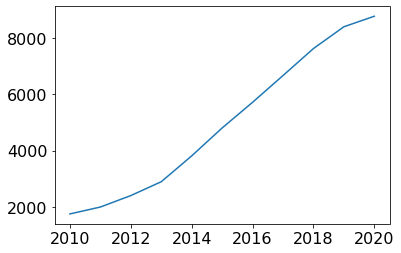

In [16]:
# Fix it here
s = Series([1758, 2408, 2898, 3814, 4803, 5713, 6661, 7618, 8391, 8764, 2002], \
           index=[2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2011])
# TODO: fix this crooked line plot
s=s.sort_index()
s.plot.line()

### Temperature example
Plotting lines from a DataFrame

- `DATAFRAME.plot.line()`    each column in the data frame becomes a line in the plot
- ***IMPORTANT***: lines in line plots shouldn't be crooked, you need to sort the values based on increasing order of indices!

In [17]:
# This DataFrame is made using a dict of lists
# City of Madison normal high and low (degrees F) by month
temp_df = DataFrame( {
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]}
)

# Q: do "high" and "low" become rows or columns within the DataFrame? 
# A: 
temp_df

high  low
0     26   11
1     31   15
2     43   25
3     57   36
4     68   46
5     78   56
6     82   61
7     79   59
8     72   50
9     59   39
10    44   28
11    30   16

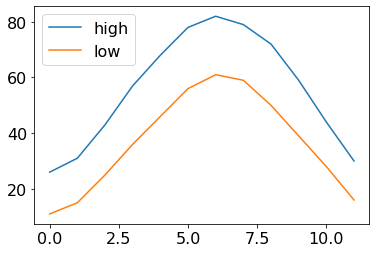

In [18]:
# Let's create line plots
 # not a nice plot
ax=temp_df.plot.line()
# Let's fix the aesthetics

### A Line Plot made from a DataFrame automatically plots all columns

The same is true for bar plots; we'll see this later.

`ax.xticks(...)`: takes as argument a sequence of numbers and add ticks at those locations.

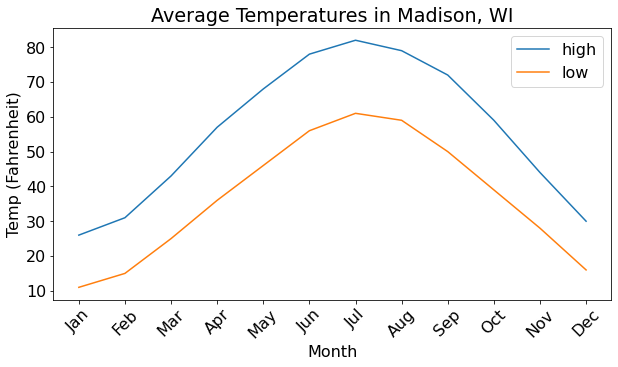

In [22]:
# You can also add ticks and ticklabels to a line plot
# TODOs:
# 1. Also add figure size as (8, 4)
# 2. Add xticks - how many do we need?
# 3. Add xticklables and rotate them by 45 degrees
#["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ax = temp_df.plot.line(figsize=(10,5))
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")
ax.set_xticks(range(12))   # makes a sequence of integers from 0 to 11
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],rotation=45)

# This gets rid of the weird output
None

Text(0, 0.5, 'Temp (Fahrenheit)')

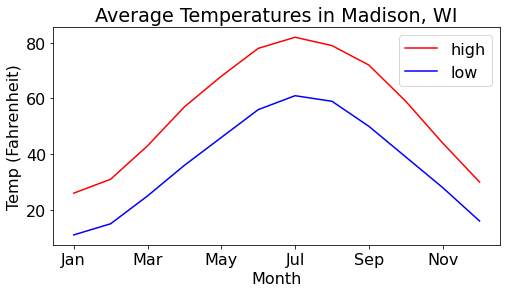

In [28]:
# We could explicitly pass arguments to the "x" and "y" parameters
temp_df_with_month = DataFrame( 
    {
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]}
)
temp_df_with_month
ax = temp_df_with_month.plot.line(x = 'month', y = 'high' ,figsize = (8, 4),c='r')
ax = temp_df_with_month.plot.line(x = 'month', y = 'low' ,figsize = (8, 4),c='b',ax=ax)
ax.set_title("Average Temperatures in Madison, WI")
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fahrenheit)")

### We can perform a calculation on an entire DataFrame
Let's change the entire DataFrame to Celcius

In [29]:
# call the function on the dataframe
celcius_df = f_to_c(temp_df)
celcius_df

high        low
0   -3.333333 -11.666667
1   -0.555556  -9.444444
2    6.111111  -3.888889
3   13.888889   2.222222
4   20.000000   7.777778
5   25.555556  13.333333
6   27.777778  16.111111
7   26.111111  15.000000
8   22.222222  10.000000
9   15.000000   3.888889
10   6.666667  -2.222222
11  -1.111111  -8.888889

In [30]:
# here is one way to add a horizontal line to our line plots
celcius_df['freezing'] = 0
celcius_df

high        low  freezing
0   -3.333333 -11.666667         0
1   -0.555556  -9.444444         0
2    6.111111  -3.888889         0
3   13.888889   2.222222         0
4   20.000000   7.777778         0
5   25.555556  13.333333         0
6   27.777778  16.111111         0
7   26.111111  15.000000         0
8   22.222222  10.000000         0
9   15.000000   3.888889         0
10   6.666667  -2.222222         0
11  -1.111111  -8.888889         0

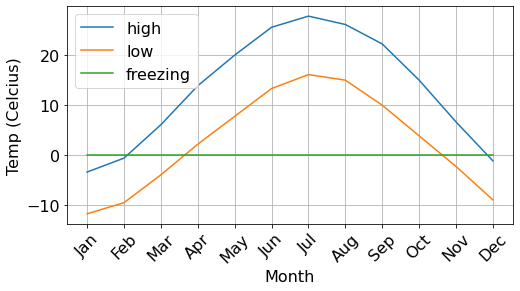

In [31]:
# this plots each column as lines
# with rotation for the tick labels
ax = celcius_df.plot.line(figsize = (8, 4))
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticks(range(12))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation = 45)
ax.grid()
None

## Bar plots using DataFrames

Bar Plot Example w/ Fire Hydrants

- General review of pandas
- Some new bar plot options

In [32]:
# TODO: read "Fire_Hydrants.csv" into a DataFrame
hdf = pd.read_csv('Fire_hydrants.csv')
hdf.tail()

X          Y  OBJECTID CreatedBy               CreatedDate  \
10104 -89.439367  43.040481    286329     WUJAG  2018-08-13T18:03:33.000Z   
10105 -89.426303  43.067854    286330     WUJAG  2018-08-13T18:14:14.000Z   
10106 -89.445461  43.053305    286729     WUJAG  2018-08-15T16:37:18.000Z   
10107 -89.388849  43.068576    286730     WUJAG  2018-08-15T16:51:54.000Z   
10108 -89.518896  43.062062    287129     WUJAG  2018-08-20T18:54:01.000Z   

      LastEditor                LastUpdate      FacilityID DataSource  \
10104      WUJAG  2018-08-13T18:04:02.000Z  HYDR-3964-4053         TC   
10105      WUJAG  2018-08-13T18:17:45.000Z  HYDR-4253-4054         TC   
10106      WUJAG  2018-08-15T16:39:24.000Z  HYDR-3859-4055         TC   
10107      WUJAG  2018-08-15T16:59:15.000Z  HYDR-5052-4056         TC   
10108      WUJAG  2018-08-20T19:27:16.000Z      -2355-4057       FASB   

      ProjectNumber  ... Elevation Manufacturer Style  year_manufactured  \
10104     1-1830-19  ...       NaN     WATEROUS   NaN             2018.0   
10105     1-1830-19  ...       NaN     WATEROUS   NaN             2017.0   
10106     1-1830-19  ...       NaN     WATEROUS   NaN             2000.0   
10107     1-1830-19  ...       NaN     WATEROUS   NaN             2017.0   
10108           NaN  ...       NaN          NaN   NaN                NaN   

      BarrelDiameter  SeatDiameter Comments nozzle_color  \
10104            5.0           NaN      NaN          NaN   
10105            5.0           NaN      NaN          NaN   
10106            5.0           NaN      NaN          NaN   
10107            5.0           NaN      NaN          NaN   
10108            NaN           NaN      NaN          NaN   

                MaintainedBy  InstallType  
10104  MADISON WATER UTILITY          NaN  
10105  MADISON WATER UTILITY          NaN  
10106  MADISON WATER UTILITY          NaN  
10107  MADISON WATER UTILITY          NaN  
10108                PRIVATE          NaN  

[5 rows x 25 columns]

In [34]:
# Extract just the column names
hdf.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

In [35]:
# Make a series called counts_series which stores the value counts of the "nozzle_color"
color_counts = hdf['nozzle_color'].value_counts()
color_counts # what is wrong with this data?

blue      5810
Blue      1148
Green      320
Orange      74
BLUE        45
green        9
Red          9
orange       4
GREEN        1
white        1
C            1
ORANGE       1
Name: nozzle_color, dtype: int64

In [36]:
# TODO: Clean the data ......use str.upper()

color_counts = hdf['nozzle_color'].str.upper().value_counts()
color_counts

BLUE      7003
GREEN      330
ORANGE      79
RED          9
WHITE        1
C            1
Name: nozzle_color, dtype: int64

Text(0.5, 0, 'Fire hydrant count')

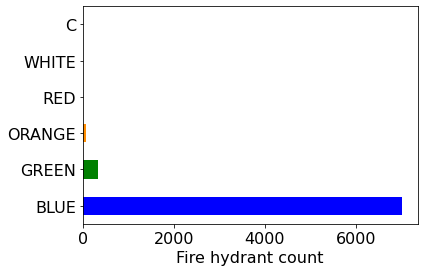

In [38]:
# Make a horizontal bar plot of counts of colors and have the colors match
# use color list: ["b", "g", "darkorange", "r", "0.5", "c"]
ax = color_counts.plot.barh(color=["b", "g", "darkorange", "r", "0.5", "c"])
ax.set_xlabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

In [ ]:
# Do the same thing as we did for the colors but this time for the "Style"
style_counts = ???
style_counts

In [ ]:
# Grab the top 12 
top12 = ???

# and them add an index to our Series for the sum of all the "other" for 
top12[???] = ???

In [ ]:
# Plot the results
ax = ???(color = "firebrick")
ax.set_ylabel("Hydrant Count")
ax.set_xlabel("Hydrant Type")

### In what *decade* were *pacers manufactured*?
### Take a peek at the *Style* column data

In [ ]:
hdf["Style"]

### Which *column* gives *year* information?

In [ ]:
hdf.columns

### How to get the *year_manufactured* for *pacers* and *others*?

In [ ]:
# Let's get the year manufactured for all of the "Pacer" hydrants.
pacer_years = ???

# Note: We can do this either way
# pacer_years = hdf["year_manufactured"][hdf["Style"] == "Pacer"]

pacer_years

In [ ]:
# then do the same for all the other data
other_years = ???
other_years

### How to get the *decade* for *pacers*?

In [ ]:
# Round each year down to the start of the decade.
# e.g. 1987 --> 1980, 2003 --> 2000
pacer_decades = ???
pacer_decades

### How to convert the *decades* back to *int*?
- `astype(...)` method
- `dropna(...)` method

In [ ]:
# Drop the NaN values, convert to int, and do value counts
pacer_decades = ???

### How to *count the decades* for pacers?

In [ ]:
pacer_decades_count = ???
pacer_decades_count

### Count the *decades* for others.

In [ ]:
# Do the same thing for other_years. Save to a variable called "other_decades"
other_decades = ???
other_decades_count = ???
other_decades_count

### Build a DataFrame from a dictionary of key, Series

In [ ]:
plot_df = DataFrame(???)
plot_df # observe the NaN values

In [ ]:
# make a bar plot

ax = ???
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

#### Ignore data from before 1950 using boolean indexing.

In [ ]:
ax = ???
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

### Stacked Bar Chart
`stacked` parameter accepts boolean value as argument

In [ ]:
ax = ???
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None